## BP算法

### sigmoid 函数 

In [15]:
import numpy as np
import matplotlib.pyplot as plt

#### 前项计算
$$ z_1 = W_1 * x$$ 
$$ z_2 = \delta(z_1)$$
$$ z_3 = W_2 * z_2$$
$$ z_4 = \delta(z_3)$$ 
$$ loss = (z_4 - real)^2 $$
#### 已知
$$ f(x) = \delta(x) $$
$$ f'(x) = \delta(x)(1-\delta(x)) $$
#### 反向传播

$$ \delta_1 = \frac{dloss}{dz_4} = 2z_4 - 2real $$
$$ \delta_2 = \frac{dz_4}{dz_3} = \delta(z_3)(1-\delta(z_3)) $$
$$ \delta_3 = \frac{dz_3}{dW_2} = z_2 $$
$$ \delta_4 = \frac{dz_3}{dz_2} = W_2 $$
$$ \delta_5 = \frac{dz_2}{dz_1} = \delta(z_1)(1-\delta(z_1)) $$
$$ \delta_6 = \frac{dz_1}{dW_1} = z_1 $$

#### 根据链式法则

$$ W_2 = W_2 - \eta \delta_1 \delta_2 \delta_4 $$

$$ W_2 = W_2 - \eta \delta_1 \delta_2 \delta_3 \delta_5 \delta_6$$

In [35]:
losses = []
def sigmoid(x):#激活函数
    return 1/(1+np.exp(-x))
input = np.array([[0.35], [0.9]]) #输入数据
w1 = np.array([[0.1, 0.8], [0.4, 0.6]])#第一层权重参数
w2 = np.array([0.3, 0.9])#第二层权重参数
 
real = np.array([[0.5]])#真实值
for s in range(0,1000,1):
    pq = sigmoid(np.dot(w1,input))#第一层输出
    output = sigmoid(np.dot(w2,pq))#第二层输出,也即是最终输出
    e = output-real #误差
    loss = np.square(e)/2
    losses.append(loss[0])
    if loss<1e-12:
        break
    else:
        #否则,按照梯度下降计算权重参数
        #其中,应用链式法则计算权重参数的更新量
        w2 = w2 - e*output*(1-output)*pq.T
        w1 = w1 - e*output*(1-output)*w2*pq.T*(1-pq.T)*input

In [36]:
print(w1)
print(w2) 
print(output)

[[0.10075115 0.75743519]
 [0.40193153 0.49054763]]
[[-0.30384153  0.31823294]]
[[0.50000137]]


### 结果

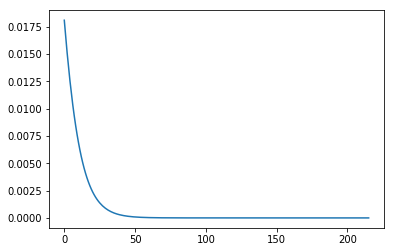

In [37]:
x = np.arange(0,len(losses),1)
plt.plot(x,losses,"-")

### relu 函数

#### 前项计算
$$ z_1 = W_1 * x$$ 
$$ z_2 = relu(z_1)$$
$$ z_3 = W_2 * z_2$$
$$ z_4 = relu(z_3)$$ 
$$ loss = (z_4 - real)^2 $$
#### 已知
$$ f(x) = relu(x) $$
###### 定义
$$g(x) = 
\left\{\begin{array}{cc} 
		1, & x>0\\ 
		0, & x\leq 0 
\end{array}\right.
$$
###### 则
$$ f'(x) = g(x) $$
#### 反向传播

$$ \delta_1 = \frac{dloss}{dz_4} = 2z_4 - 2real $$
$$ \delta_2 = \frac{dz_4}{dz_3} = g(z_3) $$
$$ \delta_3 = \frac{dz_3}{dW_2} = z_2 $$
$$ \delta_4 = \frac{dz_3}{dz_2} = W_2 $$
$$ \delta_5 = \frac{dz_2}{dz_1} = g(z_1) $$
$$ \delta_6 = \frac{dz_1}{dW_1} = z_1 $$

#### 根据链式法则

$$ W_2 = W_2 - \eta \delta_1 \delta_2 \delta_4 $$

$$ W_2 = W_2 - \eta \delta_1 \delta_2 \delta_3 \delta_5 \delta_6$$

In [38]:
losses = []
def relu(x):#激活函数
    x_index = x <= 0
    x[x_index] = 0
    return x

def bp_relu(x):#激活函数求导结果
    x_index = x <= 0
    x[x_index] = 0
    x_index = x > 0
    x[x_index] = 1
    return x

input = np.array([[0.35], [0.9]]) #输入数据
w1 = np.array([[0.1, 0.8], [0.4, 0.6]])#第一层权重参数
w2 = np.array([0.3, 0.9])#第二层权重参数
 
real = np.array([[0.5]])#真实值
for s in range(0,1000,1):
    pq = relu(np.dot(w1,input))#第一层输出
    output = relu(np.dot(w2,pq))#第二层输出,也即是最终输出
    e = output-real #误差
    loss = np.square(e)/2
    losses.append(loss[0])
    if loss<1e-12:
        break
    else:
        #否则,按照梯度下降计算权重参数
        #其中,应用链式法则计算权重参数的更新量
        w2 = w2 - e*bp_relu(output)*pq.T
        w1 = w1 - e*bp_relu(output)*w2*bp_relu(pq.T)*input

In [39]:
print(w1)
print(w2) 
print(output)

[[0.10070437 0.75123983]
 [0.40181123 0.47461672]]
[[0.12382036 0.72547718]]
[[0.49999909]]


### 结果

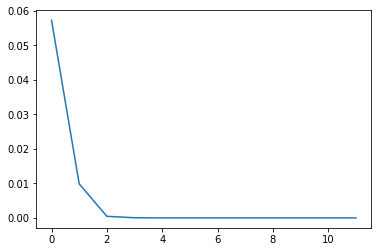

In [40]:
x = np.arange(0,len(losses),1)
plt.plot(x,losses,"-")